In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import Ridge
import seaborn as sns

In [3]:
annual_factors = Path("Resources/Annual_Macroeconomic_Factors.csv")
annual_factors_pd = pd.read_csv(annual_factors)
annual_factors_pd = annual_factors_pd.set_index("Date")
annual_factors_pd

,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
Date,,,,,,,,
1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908.0
1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346.0
1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780.0
1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497.0
1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672.0
1980-01-01,102.6675,100.00000,100.00000,0.95959,7.14167,6763.514,13.74212,21584.0
1981-01-01,107.2375,108.67516,110.33472,0.98142,7.60000,6935.153,16.64151,21891.0
1982-01-01,108.4600,101.20645,117.09981,0.95332,9.70833,6810.120,16.04365,22156.0
1983-01-01,116.2425,136.01719,120.86156,0.91438,9.61667,7122.290,13.23538,22714.0


<AxesSubplot:title={'center':'HPI by Year'}, xlabel='Year (In January)', ylabel='House Price Index'>

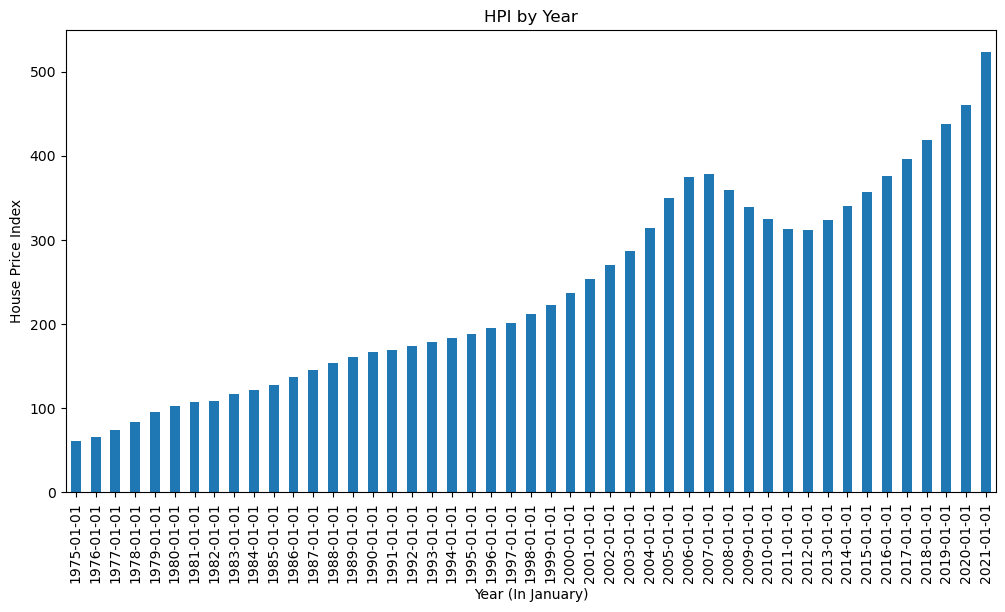

In [4]:
# Narrowing data specifically to look at the House Price Index 
house_index = annual_factors_pd["House_Price_Index"]

# Make bar graph of HPI vs Year
bar_graph = house_index.plot(kind="bar", figsize=(12,6))
bar_graph.set_title("HPI by Year")
bar_graph.set_ylabel("House Price Index")
bar_graph.set_xlabel("Year (In January)")
bar_graph

<AxesSubplot:title={'center':'Unemployment Rate by Year'}, xlabel='Year (In January)', ylabel='Unemployment Rate (%)'>

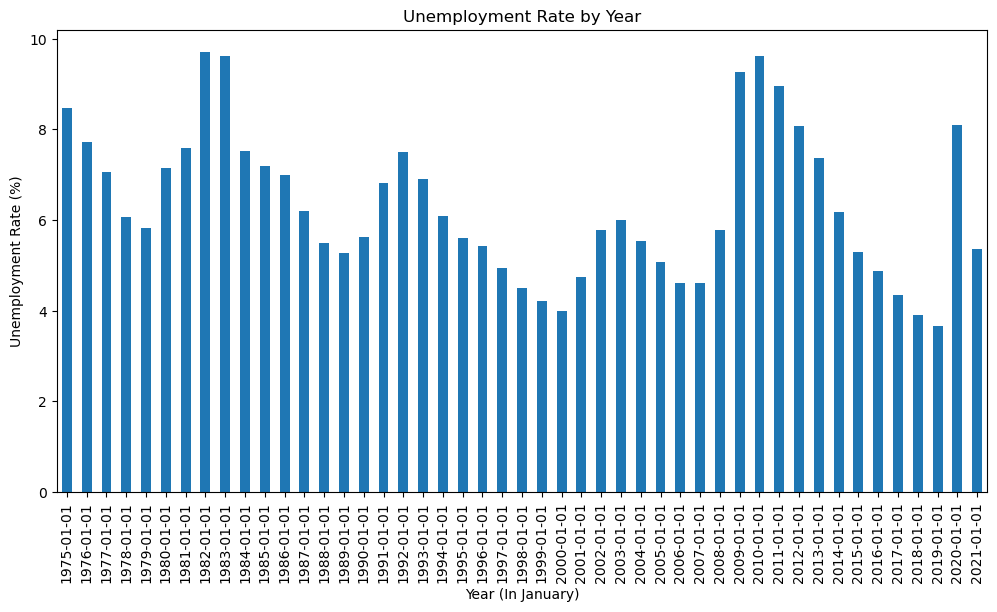

In [5]:
# Repeat the above cell with unemployment rate instead of HPI
unemployment = annual_factors_pd["Unemployment_Rate"]

# Make another bar graph for unemployment vs year
bar_graph = unemployment.plot(kind="bar", figsize=(12, 6))
bar_graph.set_title("Unemployment Rate by Year")
bar_graph.set_ylabel("Unemployment Rate (%)")
bar_graph.set_xlabel("Year (In January)")
bar_graph


<AxesSubplot:title={'center':'GDP Growth Over Time'}, xlabel='Date', ylabel='Year (In January)'>

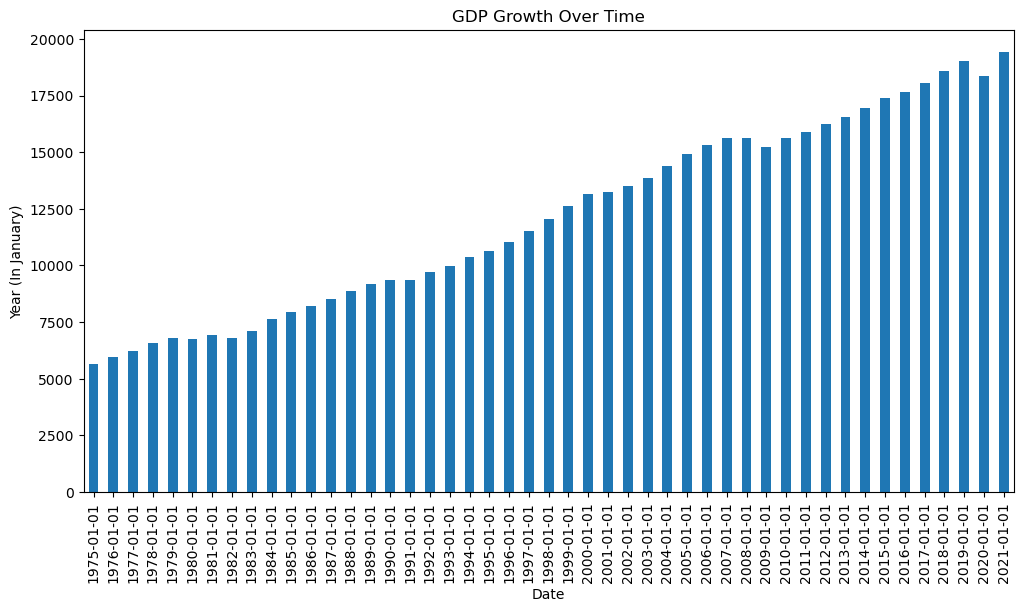

In [6]:
# repeat above cells for GDP
gdp = annual_factors_pd["Real_GDP"]

#make bar graph showing GDP vs time
bar_graph = gdp.plot(kind="bar", figsize=(12, 6))
bar_graph.set_title("GDP Growth Over Time")
bar_graph.set_ylabel("GDP")
bar_graph.set_ylabel("Year (In January)")
bar_graph

<AxesSubplot:title={'center':'CPI by Year'}, xlabel='Year (In January)', ylabel='CPI'>

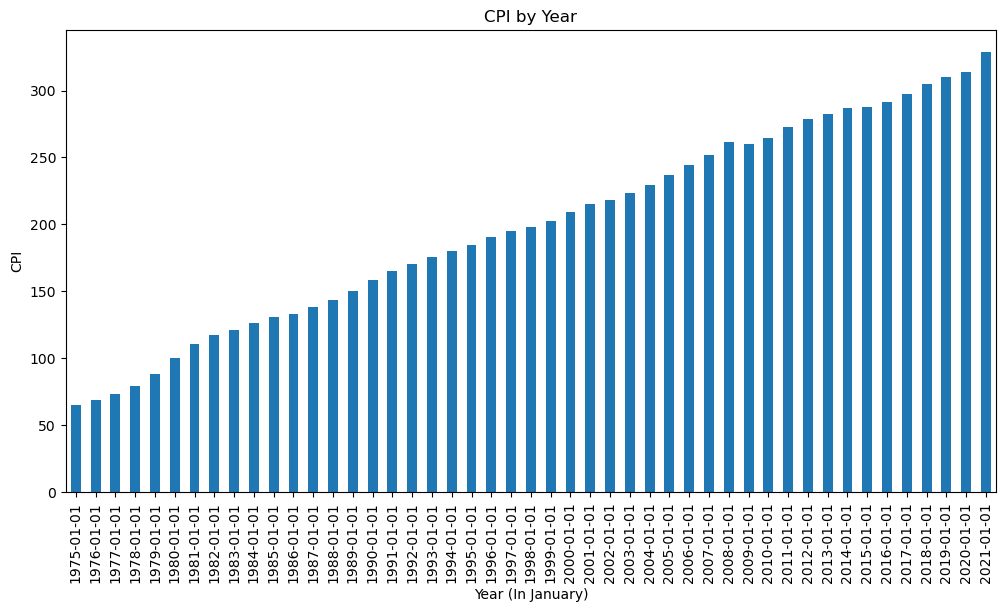

In [7]:
# repeat above cells for CPI
cpi = annual_factors_pd["Consumer_Price_Index"]

# creat bar graph comparing CPI over time
bar_graph = cpi.plot(kind="bar", figsize=(12, 6))
bar_graph.set_title("CPI by Year")
bar_graph.set_ylabel("CPI")
bar_graph.set_xlabel("Year (In January)")
bar_graph

Text(0.7, 0.9, 'r = 0.98')

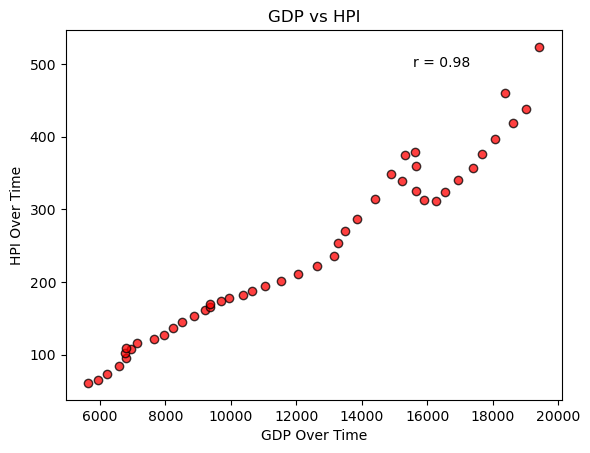

In [8]:
# scatter plot comparing gdp over time to hpi over time
plt.scatter(gdp, house_index, marker="o", facecolors="red", edgecolors="black", alpha=0.75, )
plt.title("GDP vs HPI")
plt.xlabel("GDP Over Time")
plt.ylabel("HPI Over Time")

# add correlation coefficient (r)
r, p = stats.pearsonr(gdp, house_index)
plt.annotate("r = {:.2f}".format(r), xy=(0.7, 0.9), xycoords="axes fraction")
